# Final Project:   MNIST Classifiers

CUNY MSDA - DATA 602: Advanced Programming Techniques<br>
_Author - Walt Wells_

## Resources

Some words about the OSDC...

## Environment Prep

In [1]:
import os
import struct
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

## Data Import and Preparation

In [2]:
def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set as a pandas data frame. 
    The first column is the label/class, the other 784 columns are the pixel values.  
    Uses code liberally from https://gist.github.com/akesling/5358964, but works to build
    a table similar to the Kaggle digit recognizer dataset: https://www.kaggle.com/c/digit-recognizer
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError, "dataset must be 'testing' or 'training'"
    
    # get labels
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.uint8)

    # get pixel values
    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), 1, 784)
        img = img.tolist()
        img = list(itertools.chain(*img))
    
    data = [] #initialize list
    
    # get row for DF
    def get_img(idx): 
        row = img[idx]
        row.insert(0, lbl[idx])
        return row

    # populate list with rows for each image
    for i in xrange(len(lbl)):
        data.append(get_img(i))
    
    # convert to df
    df = pd.DataFrame(data)
    df.rename(columns={0:'label'}, inplace=True)
    return df

### Import Train and Testing Data

In [3]:
mtrain = read("training")
mtest = read("testing")
print "Training Data: ", mtrain.shape
print "Testing Data: ", mtest.shape
mtrain.head(5)

Training Data:  (60000, 785)
Testing Data:  (10000, 785)


,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Review Training and Test Label Distributions

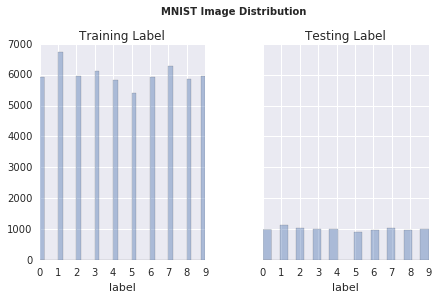

In [4]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
plt.suptitle('MNIST Image Distribution', fontweight='bold')
sns.distplot(mtrain.label, kde=False, ax=ax1).set_title('Training Label');
sns.distplot(mtest.label, kde=False, ax=ax2).set_title('Testing Label');
plt.subplots_adjust(top=.85, bottom=0.1, left=0.05, right=0.95, hspace=0.8,
                    wspace=0.35)

## Image Visualization

In [5]:
def rowconverter(df, idx):
    """
    given a df and a index, get a label for the image, and convert 
    back to a 28^2 np.array
    """
    row = df.loc[[idx]]
    label = row.iloc[0]['label']
    row.pop('label')
    image = row.as_matrix().reshape(28,28)
    return label, image

# Both of the visualization tools below contain code taken liberally from
# https://gist.github.com/akesling/5358964

def ascii_show(image):
    """
    Show pixel values in formation
    """
    for y in image[1]:
         row = ""
         for x in y:
             row += '{0: <4}'.format(x)
         print row
        
def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    title = "Image Label : " + str(image[0])
    fig = plt.figure()
    plt.title(title)
    imgplot1 = plt.imshow(image[1], cmap=mpl.cm.Greys)
    imgplot1.set_interpolation('nearest')
    plt.show()

### Visualize Random Example in Training Data

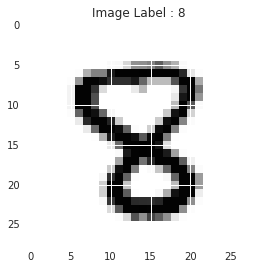

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   10  13  65  132 133 144 178 132 105 9   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   4   106 145 145 232 252 252 252 253 252 252 252 252 221 47  4   0   0   0   0   0   0   
0   0   0   0   0   4   126 252 252 242 216 216 216 233 171 96  96  96  190 252 252 111 0   0   0   0   0   0   
0   0   0   0   0   25  252 252 212 60  0   0   0   40  98  0   0   0   20  212 252 155 0   0   

In [6]:
img = rowconverter(mtrain, randint(0,len(mtrain)))

show(img)
ascii_show(img)

## Training Classifiers

## References

* https://www.kaggle.com/archaeocharlie/digit-recognizer/a-beginner-s-approach-to-classification
* https://martin-thoma.com/classify-mnist-with-pybrain/
* https://gist.github.com/akesling/5358964
* When Life is Linear, Tim Chartier
* http://colah.github.io/posts/2014-10-Visualizing-MNIST/
* https://www.tensorflow.org/get_started/mnist/beginners